# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [38]:
import pandas as pd
df = pd.read_csv("sample_NYC_parking_issues.csv",sep=";")
df.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS),NaN,NaN,NaN
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,NaN,0.0,2006.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean),NaN,NaN,NaN
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM),NaN,NaN,NaN


### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   Summons Number                     10000 non-null  int64  
 2   Plate ID                           9998 non-null   object 
 3   Registration State                 10000 non-null  object 
 4   Plate Type                         10000 non-null  object 
 5   Issue Date                         10000 non-null  object 
 6   Violation Code                     10000 non-null  int64  
 7   Vehicle Body Type                  9887 non-null   object 
 8   Vehicle Make                       9918 non-null   object 
 9   Issuing Agency                     10000 non-null  object 
 10  Street Code1                       10000 non-null  int64  
 11  Street Code2                       10000 non-null  int6

In [40]:
df.drop(columns=["No Standing or Stopping Violation"],inplace=True)
df.drop(columns=["Hydrant Violation"],inplace=True)
df.drop(columns=["Double Parking Violation"],inplace=True)

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [41]:
df['Vehicle Year'].unique()

array([2004., 2008., 2006., 1996., 2003., 2012., 2011.,    0., 2001.,
       1988., 1998., 2009., 2002., 1994., 1997., 2007., 2010., 2013.,
       1995., 2005., 1999., 2014., 1987., 1985., 1989., 1993., 1992.,
       1990., 2015., 1982., 1991., 1986., 1984., 1983., 2069., 1980.])

In [42]:
#Vemos q hay coches con año 0 y un coche con año 2069, vamos a eliminar estos registros
df = df[(df['Vehicle Year']>0) & (df['Vehicle Year']<2025)]
df['Vehicle Year'] = df['Vehicle Year'].astype(int)
df['Vehicle Year'].unique()

array([2004, 2008, 2006, 1996, 2003, 2012, 2011, 2001, 1988, 1998, 2009,
       2002, 1994, 1997, 2007, 2010, 2013, 1995, 2005, 1999, 2014, 1987,
       1985, 1989, 1993, 1992, 1990, 2015, 1982, 1991, 1986, 1984, 1983,
       1980])

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [35]:
df['Vehicle Make'].unique()
#No tienen sentido FRIG, INTER, NS/OT, PETER, FRUEH, WORK, PREV, SOLEC, MI/F, NAVIS, STARC, VAN H, SMITH, UD, PRATT, 
#CHEET, UTITY, PREVO, W, FR/L, FR L, FRGHT, ICENE, UTILI, WO/C, THD, GEM, WHITE, CHECK, 
#WANC, LIMO, BL/B, KRYS, MCI, KW, SZI, STAR, UPS, HERCU, GIDNY, SPRI, VL, WOR, PUTEL, FRG.

array(['FRIG', 'DODGE', 'HONDA', 'TOYOT', 'VOLKS', 'INTER', 'FORD', 'GMC',
       'ME/BE', 'NISSA', 'CHEVR', 'INFIN', 'LEXUS', 'VOLVO', 'MERCU',
       'ACURA', 'NS/OT', 'BMW', 'PETER', 'LINCO', 'ISUZU', 'FRUEH',
       'CHRYS', 'CADIL', 'WORK', 'SUBAR', 'HYUND', 'SAAB', 'PREV',
       'PONTI', 'MITSU', 'ROVER', 'JEEP', 'MAZDA', 'LEXCO', 'WORKH',
       'PORSC', 'FREI', 'AUDI', 'MACK', 'HINO', 'KIA', 'KENWO', 'BENTL',
       'UTIL', 'JAGUA', 'SOLEC', nan, 'MI/F', 'MINI', 'BUICK', 'SATUR',
       'NAVIS', 'STARC', 'OLDSM', 'VAN H', 'SMITH', 'UD', 'PRATT',
       'FR/LI', 'CHEET', 'SMART', 'UTITY', 'PREVO', 'PLYMO', 'SUZUK',
       'HUMME', 'W', 'KAWAS', 'FIAT', 'FR/L', 'FR L', 'FRGHT', 'ICENE',
       'UTILI', 'WO/C', 'THD', 'VESPA', 'GEM', 'WHITE', 'CHECK', 'RNG R',
       'WANC', 'VOLU', 'LIMO', 'BL/B', 'KENW', 'KRYS', 'MCI', 'KW', 'SZI',
       'STAR', 'UPS', 'HERCU', 'GIDNY', 'SPRI', 'VL', 'WOR', 'AMC',
       'PUTEL', 'FRG'], dtype=object)

In [54]:
marcas_no_validas = [ 'FRIG', 'INTER', 'NS/OT', 'PETER', 'FRUEH', 'WORK', 'PREV', 
    'SOLEC', 'MI/F', 'NAVIS', 'STARC', 'VAN H', 'SMITH', 'UD', 'PRATT', 
    'CHEET', 'UTITY', 'PREVO', 'W', 'FR/L', 'FR L', 'FRGHT', 
    'ICENE', 'UTILI', 'WO/C', 'THD', 'GEM', 'WHITE', 'CHECK', 
    'WANC', 'LIMO', 'BL/B', 'KRYS', 'MCI', 'KW', 'SZI', 'STAR', 
    'UPS', 'HERCU', 'GIDNY', 'SPRI', 'VL', 'WOR', 'PUTEL', 'FRG']

df = df[~df['Vehicle Make'].isin(marcas_no_validas)]
n = len(marcas_no_validas)
print("Hemos descartado un total de",n,"marcas no validas")

Hemos descartado un total de 45 marcas no validas


In [55]:
df['Vehicle Make'].unique()

array(['DODGE', 'HONDA', 'TOYOT', 'VOLKS', 'FORD', 'GMC', 'ME/BE',
       'NISSA', 'CHEVR', 'INFIN', 'LEXUS', 'VOLVO', 'MERCU', 'ACURA',
       'BMW', 'LINCO', 'ISUZU', 'CHRYS', 'CADIL', 'SUBAR', 'HYUND',
       'SAAB', 'PONTI', 'MITSU', 'ROVER', 'JEEP', 'MAZDA', 'LEXCO',
       'WORKH', 'PORSC', 'FREI', 'AUDI', 'MACK', 'HINO', 'KIA', 'KENWO',
       'BENTL', 'UTIL', 'JAGUA', nan, 'MINI', 'BUICK', 'SATUR', 'OLDSM',
       'FR/LI', 'SMART', 'PLYMO', 'SUZUK', 'HUMME', 'KAWAS', 'FIAT',
       'VESPA', 'RNG R', 'VOLU', 'KENW', 'AMC'], dtype=object)

### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

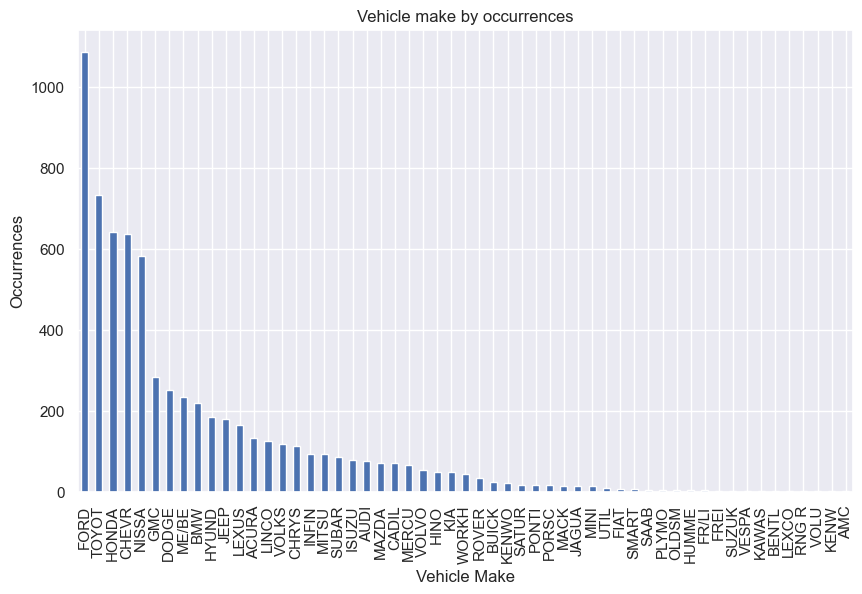

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

marcas = df["Vehicle Make"].value_counts()

marcas.index.name = "Vehicle Make"

ax = marcas.plot(kind="bar", figsize=(10, 6))
ax.set_ylabel("Occurrences")
plt.title("Vehicle Make by occurrences")
plt.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [65]:
df['Vehicle Color'].unique()

array(['BK', nan, 'GY', 'MR', 'RD', 'BR', 'TAN', 'BL', 'WHITE', 'WH',
       'BLUE', 'BLACK', 'TN', 'BROWN', 'OTHER', 'YW', 'BLK', 'DKB',
       'GREY', 'GOLD', 'GR', 'BRN', 'PR', 'LTP', 'RED', 'GRN', 'DKGY',
       'WT', 'SILVE', 'SILV', 'DKG', 'GRAY', 'GREEN', 'WHT', 'GL', 'GREN',
       'WTH', 'WH-BL', 'YELLO', 'SIL', 'ORANG', 'BUY', 'GRY', 'GYT', 'OR',
       'SL', 'LTGY', 'YL', 'BEIGE', 'LTBL', 'BN', 'LTG', 'LT/', 'W',
       'NOCL', 'WHR', 'GYW', 'BLU', 'GY/', 'WHI', 'NOC', 'BG', 'GN',
       'GRG', 'SILVR', 'YEL', 'BKJ', 'GYGY', 'DK/', 'WH/', 'DKR', 'BLK/B',
       'PURPL', 'UNKNO', 'YELOW', 'R', 'BLGY', 'TNGR', 'DKBL', 'TOPAZ',
       'RB', 'GY-GY', 'WGUTE', 'RD/', 'WHIT', 'BLG', 'LTB', 'GYTN', 'GRT',
       'GYBR', 'PUR', 'BKBR'], dtype=object)

In [67]:
Color = {
    'BK': 'black', 'BLACK': 'black', 'BLK': 'black', 'BLK/B': 'black',
    'WH': 'white', 'WHITE': 'white', 'WT': 'white', 'WHT': 'white', 'WHI': 'white', 'WHIT': 'white', 'WTH': 'white',
    'GY': 'gray', 'GREY': 'gray', 'GRAY': 'gray', 'GRY': 'gray', 'GYT': 'gray', 'GY/': 'gray', 'GYGY': 'gray',
    'RD': 'red', 'RED': 'red', 'R': 'red', 'RD/': 'red',
    'BL': 'blue', 'BLUE': 'blue', 'BLU': 'blue',
    'GR': 'green', 'GRN': 'green', 'GREEN': 'green', 'GREN': 'green', 'GN': 'green',
    'TN': 'tan', 'TAN': 'tan',
    'BR': 'brown', 'BRN': 'brown', 'BROWN': 'brown', 'BKBR': 'brown',
    'YW': 'yellow', 'YEL': 'yellow', 'YELLO': 'yellow', 'YELOW': 'yellow', 'YL': 'yellow',
    'SILV': 'silver', 'SILVE': 'silver', 'SIL': 'silver', 'SILVR': 'silver',
    'PR': 'purple', 'PURPL': 'purple', 'PUR': 'purple',
    'GL': 'gold', 'GOLD': 'gold',
    'OR': 'orange', 'ORANG': 'orange',
    'BEIGE': 'beige',
    'OTHER': 'other', 'UNKNO': 'unknown', 'NOC': 'unknown', 'NOCL': 'unknown', 'BUY': 'unknown',
    'DK': 'dark', 'LT': 'light', 'DKG': 'dark gray', 'LTG': 'light gray', 'LTGY': 'light gray',
    'DKGY': 'dark gray', 'DKBL': 'dark blue', 'LTBL': 'light blue'
}

df['Vehicle Color'] = df['Vehicle Color'].str.upper().map(Color).fillna('unknown')

df['Vehicle Color'].unique()

array(['black', 'unknown', 'gray', 'red', 'brown', 'tan', 'blue', 'white',
       'other', 'yellow', 'gold', 'green', 'purple', 'dark gray',
       'silver', 'orange', 'light gray', 'beige', 'light blue',
       'dark blue'], dtype=object)

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

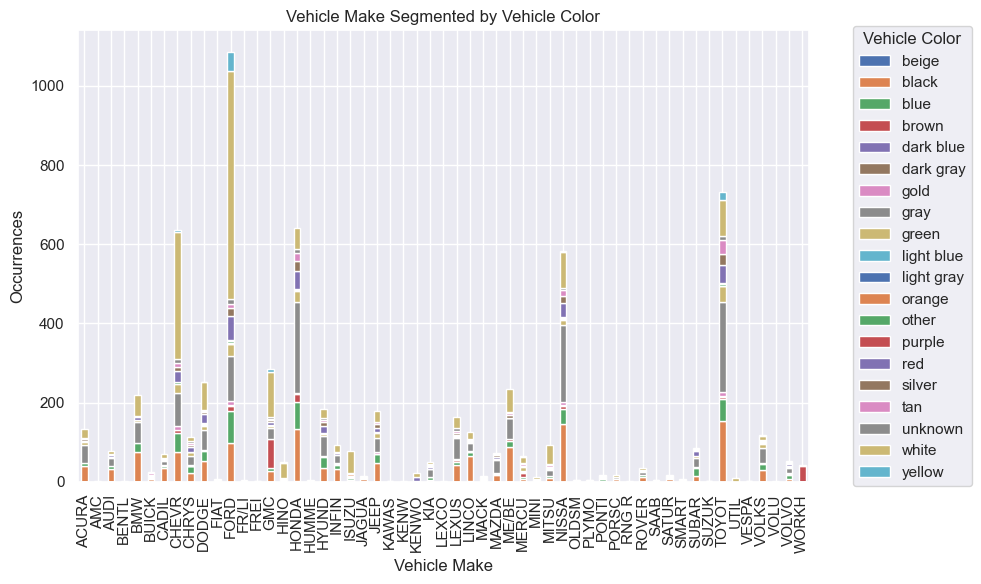

In [74]:
marca_color = pd.crosstab(df['Vehicle Make'], df['Vehicle Color'])

ax = marca_color.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_ylabel("Occurrences")
plt.title("Vehicle Make Segmented by Vehicle Color")
ax.legend(title='Vehicle Color', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [82]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
multas_por_fecha_y_codigo = df.groupby([df['Issue Date'].dt.date, 'Violation Code']).size().reset_index(name='Count')

### J) Visualiza la anterior cuestión (I)

In [83]:
print(multas_por_fecha_y_codigo)

      Issue Date  Violation Code  Count
0     2012-03-03              20      1
1     2012-10-11              46      1
2     2012-10-30              19      1
3     2013-01-09              71      1
4     2013-01-30              45      1
...          ...             ...    ...
3498  2014-06-25              46      1
3499  2014-06-25              69      1
3500  2014-08-23              24      1
3501  2014-10-08              47      1
3502  2015-02-01              19      1

[3503 rows x 3 columns]


### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'